## HOUSE RENT PREDICTIONS

* try to make it in pipeline 
    * first spplit dataset as homogenious as we can
    * encode it 
    * imputer check please
    * scale normalization check 
    * show some diagrams
    * solve with regression decison tree and random forest 


* then try to developed gui which will guess the price for a single house

![image](./imagegit/image.png)

this table will guide us to choose right method to get better results!
 * though we have supervised and continuous problem we should focus on random forest decision tree and linear and polynomial regression


### IMPORT LIBS AND GET DATASET

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df =pd.read_csv('C:/Users/emreb/Documents/projects/houserentpre/dts/House_Rent_Dataset.csv')

In [18]:
df.loc[df['Bathroom']==2]['Size'].mean()

916.2937581841991

In [34]:
answer_set = {
                        'Tenant Preferred': [5],
                        'BHK': [5],
                        'floor level': [3],
                        'Area Type': [2],
                        'City': [1],
                        'Furnishing Status': [2],
                        'Bathroom':[1],

                        }

In [35]:
dff = pd.DataFrame.from_dict(answer_set)

In [40]:
klist = list(df.columns.difference(dff.columns))

In [41]:
klist.remove('Rent')

In [42]:
klist

['Area Locality', 'Floor', 'Point of Contact', 'Posted On', 'Size']

In [43]:
dff

,Tenant Preferred,BHK,floor level,Area Type,City,Furnishing Status,Bathroom
0,5,5,3,2,1,2,1


In [44]:
for i in klist:
    dff[i] = 0
dff

,Tenant Preferred,BHK,floor level,Area Type,City,Furnishing Status,Bathroom,Area Locality,Floor,Point of Contact,Posted On,Size
0,5,5,3,2,1,2,1,0,0,0,0,0


In [33]:
list(df.columns)

['Posted On',
 'BHK',
 'Rent',
 'Size',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom',
 'Point of Contact']

In [29]:
list(df.select_dtypes(include='object').columns)

['Posted On',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [20]:
answer_set['City']

1

###  EXAMINE THE DATASET

In [5]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [45]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [7]:
df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
20 out of 31         1
21 out of 21         1
35 out of 60         1
20 out of 37         1
14 out of 58         1
Name: Floor, Length: 480, dtype: int64

In [8]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


#### tune it

In [46]:
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['month'] = df['Posted On'].dt.month
df['year'] = df['Posted On'].dt.year

In [47]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month,year
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,2022
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,2022
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,2022
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,2022
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,2022
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,2022
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,2022
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,7,2022


In [48]:
df2 = df.copy()

In [9]:
df2

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month,year
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,2022
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,2022
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,2022
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,2022
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,2022
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,2022
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,2022
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,7,2022


In [49]:
df2 = df2.join(df['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'floor level', 1:'total floor'}))
df2['floor level'] = df2.apply(lambda x: 0 if x['floor level'] =='Ground' \
                               else ( -2 if x['floor level'] =='Lower Basement' else -1 if x['floor level'] =='Upper Basement' else (x['floor level']) ) , axis=1)
print("Status: Changed 'Ground'=0, 'Lower Basement'=-1, Rest = total floor")
df2.drop('Floor',axis=1,inplace=True)


Status: Changed 'Ground'=0, 'Lower Basement'=-1, Rest = total floor


In [11]:
df2.loc[df2['floor level']==-1]

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month,year,floor level,total floor
290,2022-06-29,1,3500,200,Super Area,Baguihati,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,6,2022,-1,4
549,2022-06-02,2,8000,650,Carpet Area,"Nakoda Heights, Nalasopara",Mumbai,Semi-Furnished,Family,2,Contact Agent,6,2022,-1,9
559,2022-05-22,1,30000,488,Carpet Area,"Kyraa Ariso Apartment, Chembur",Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,2022,-1,16
631,2022-06-04,4,310000,2600,Carpet Area,Lokhandwala Complex,Mumbai,Unfurnished,Family,4,Contact Agent,6,2022,-1,20
633,2022-07-06,3,65000,950,Carpet Area,Tilak Nagar - Harbour Line,Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,2022,-1,9
635,2022-05-18,3,150000,1330,Carpet Area,Lodha Ajuro tower lalbag,Mumbai,Unfurnished,Bachelors/Family,3,Contact Agent,5,2022,-1,40
694,2022-07-09,3,55000,900,Carpet Area,Chikuwadi,Mumbai,Semi-Furnished,Family,2,Contact Agent,7,2022,-1,10
722,2022-06-04,2,100000,750,Carpet Area,"Lodha NCP Commercial , Wadala",Mumbai,Unfurnished,Bachelors/Family,2,Contact Agent,6,2022,-1,30
952,2022-06-24,3,160000,2000,Carpet Area,"Flora Heights, Andheri West",Mumbai,Furnished,Family,3,Contact Agent,6,2022,-1,30
1098,2022-04-29,1,25000,400,Carpet Area,shanti kutir tunga village powai,Mumbai,Unfurnished,Bachelors/Family,1,Contact Owner,4,2022,-1,7


In [50]:
df2.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
month                0
year                 0
floor level          0
total floor          4
dtype: int64

In [51]:
df2.dropna(inplace=True)

In [52]:
def convertto_int(df,columns):
    for col in columns:
        df[col] = df[col].astype('int64')
        
    # return df

In [53]:
tonum_cols = ['floor level', 'total floor']

In [54]:
convertto_int(df2,tonum_cols)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4742 non-null   datetime64[ns]
 1   BHK                4742 non-null   int64         
 2   Rent               4742 non-null   int64         
 3   Size               4742 non-null   int64         
 4   Area Type          4742 non-null   object        
 5   Area Locality      4742 non-null   object        
 6   City               4742 non-null   object        
 7   Furnishing Status  4742 non-null   object        
 8   Tenant Preferred   4742 non-null   object        
 9   Bathroom           4742 non-null   int64         
 10  Point of Contact   4742 non-null   object        
 11  month              4742 non-null   int64         
 12  year               4742 non-null   int64         
 13  floor level        4742 non-null   int64         
 14  total fl

In [18]:
# pd.to_numeric(df2['floor level'])
# pd.to_numeric(df2['total floor'])

In [ ]:
df2.loc[df2['total floor'] == 1]

#### Encode Columns

* Posted on  numerical cont
* bhk        numerical disc
* rent       numerical cont
* size       numerical cont
* floor      cat       disc(ordinal)
* area type  cat       ordinal
* area loc   cat       ordinal
* city       cat       nominal
* furnished  cat       ordninal
* tenant     cat       ordinal
* poinocon   cat       ordinal

In [56]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer


In [57]:
# get rid of outliers
df2= df2[~df2['Point of Contact'].str.contains("Contact Builder")]
df2 = df2[~df2['Area Type'].str.contains("Built Area")]
df2 = df2[df2.Rent < 3400000]

In [58]:
orcat_vars  = [ 'total floor', 'Area Type', 'Area Locality', 'Furnishing Status', 'Tenant Preferred'] 
nomcat_vars  = ['City', 'Point of Contact']
cate_vars  = ['Furnishing Status', 'Tenant Preferred','Point of Contact','City','Area Type']

In [17]:
# df3['Posted On '] = pd.to_datetime(df3['Posted On'],errors='coerce')

In [59]:
coltodrop = ['Area Locality', 'Posted On']

In [60]:
def drop_unnecs(df,columns):
    for col in columns:

        df.drop(col,axis=1,inplace=True)
    return df

In [61]:
drop_unnecs(df2,coltodrop)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month,year,floor level,total floor
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,2022,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,2022,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,2022,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,2022,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,2022,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,5,2022,3,5
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,5,2022,1,4
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,7,2022,3,5
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,7,2022,23,34


WE will ordinally encode area type tenant preferred and furnishing status however 

In [62]:
def one_hot_encode(df, column):
    # Get one hot encoding of columns B
    one_hot = pd.get_dummies(df[column])
    # Drop column as it is now encoded
    df = df.drop(column,axis = 1)
    print(f"one hot encoded {column}")
    # Join the encoded df
    df = df.join(one_hot)
    return df
# df3 = df2.copy()


#### Label encode

In [51]:
import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['Furnishing Status'],return_df=True,
                           mapping=[{'col':'Furnishing Status','mapping':{'Unfurnished':0,'Semi-Furnished':1,'Furnished':2}}])

df2["Furnishing Status"] = encoder.fit_transform(df2["Furnishing Status"])

In [52]:

encoder= ce.OrdinalEncoder(cols=['Area Type'],return_df=True,
                           mapping=[{'col':'Area Type','mapping':{'Built Area':0,'Super Area':1,'Carpet Area':2}}])

df2["Area Type"] = encoder.fit_transform(df2["Area Type"])

In [53]:
encoder= ce.OrdinalEncoder(cols=['Tenant Preferred'],return_df=True,
                           mapping=[{'col':'Tenant Preferred','mapping':{'Bachelors':0,'Bachelors/Family':1,'Family':2}}])

df2["Tenant Preferred"] = encoder.fit_transform(df2["Tenant Preferred"])

In [18]:
df2

,BHK,Rent,Size,Bathroom,floor level,total floor,Furnished,Semi-Furnished,Unfurnished,Bachelors,...,Contact Agent,Contact Owner,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Carpet Area,Super Area
0,2,10000,1100,2,0,2,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,2,20000,800,1,3,3,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2,17000,1000,1,3,3,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,2,10000,800,1,2,2,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,2,7500,850,1,2,2,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,5,5,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4742,3,29000,2000,3,4,4,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4743,3,35000,1750,3,5,5,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4744,3,45000,1500,2,34,34,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


#### scale or normalization

#### EDA

just look only numerical data and see correlations then we will encode all columns and will see more detailed correlations

<AxesSubplot:>

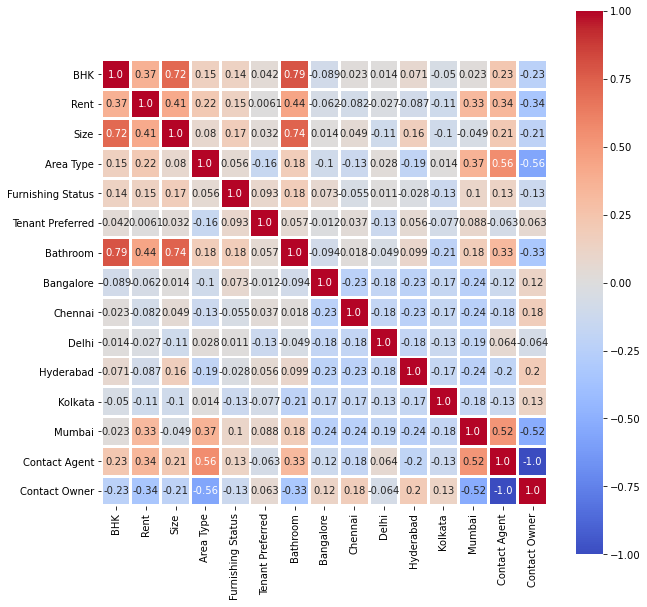

In [21]:
corr = df2.corr()
plt.figure(figsize=(10, 10))
matrix = np.triu(df2.corr())
sns.heatmap(corr,annot=True,fmt=".2",cmap= 'coolwarm',linewidths=2,square = True)

In [23]:
sns.set(rc={'figure.figsize':(7,8)})

In [1]:
sns.barplot(x='BHK', y='Rent', data=df2) #money talks here

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

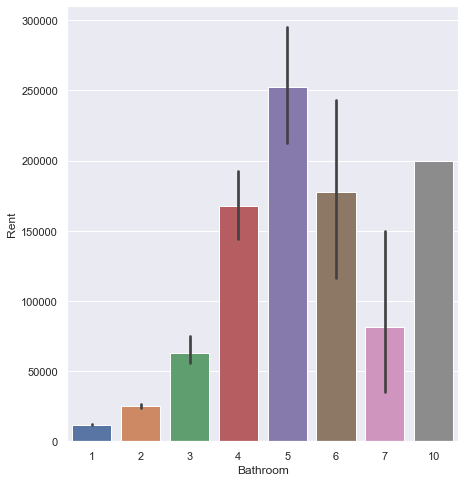

In [25]:
sns.barplot(x='Bathroom', y='Rent', data=df2)#money talks here

<AxesSubplot:xlabel='City', ylabel='Bathroom'>

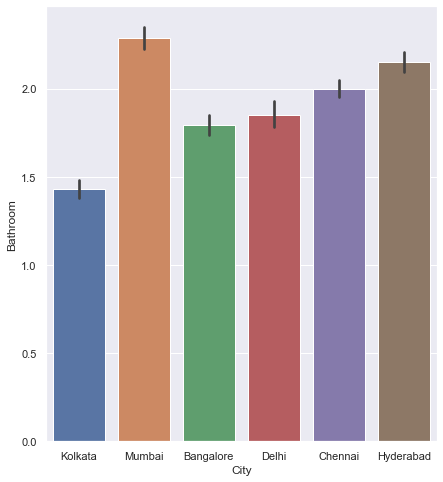

In [89]:
sns.barplot(x='City', y='Bathroom', data=df)#money talks here

<AxesSubplot:xlabel='Rent'>

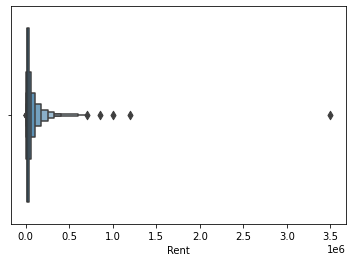

In [15]:
# We need to remove outliers 
sns.boxenplot(x = 'Rent' , data = df)

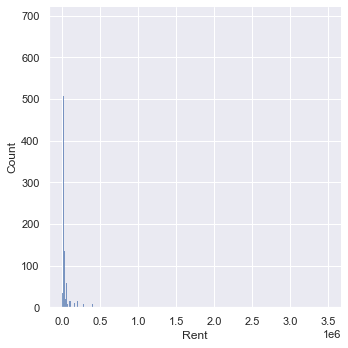

In [49]:
sns.displot(df['Rent'])

In [31]:
dflogi = np.log1p(df['Rent'])

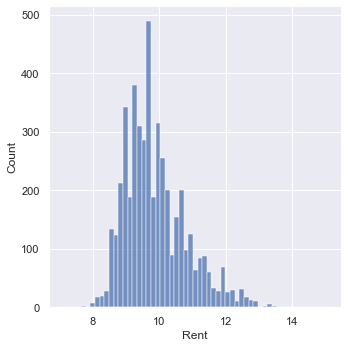

In [32]:
sns.displot(dflogi)

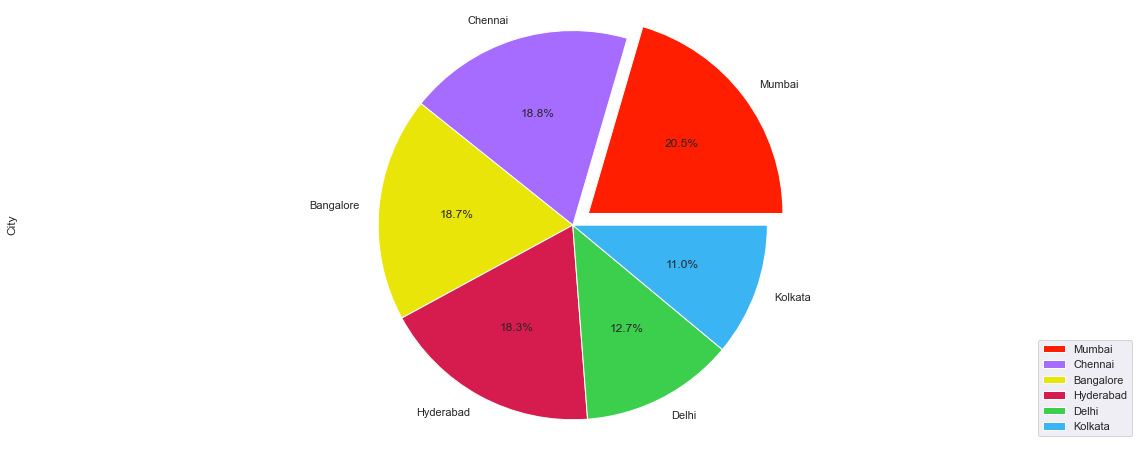

In [72]:
plt.figure(figsize = (20, 8))
counts = df["City"].value_counts()
explode = (0.1, 0, 0, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "lower right")
plt.show()

#### ML models set up

In [63]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error , mean_squared_log_error
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn import tree

In [82]:
df3 = df2.copy()
numerical_features = df3.dtypes[df3.dtypes != "object"].index

scaler = StandardScaler()
df3[numerical_features] = scaler.fit_transform(df3[numerical_features])

In [83]:
X = df3.drop('Rent',axis=1)
y =df3[['Rent']].values

In [79]:
X

,BHK,Size,Bathroom,month,year,floor level,total floor,Furnished,Semi-Furnished,Unfurnished,...,Contact Agent,Contact Owner,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Carpet Area,Super Area
0,2,1100,2,5,2022,0,2,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,2,800,1,5,2022,1,3,0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,2,1000,1,5,2022,1,3,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,2,800,1,7,2022,1,2,0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,2,850,1,5,2022,1,2,0,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,5,2022,3,5,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4742,3,2000,3,5,2022,1,4,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4743,3,1750,3,7,2022,3,5,0,1,0,...,1,0,0,0,0,1,0,0,1,0
4744,3,1500,2,7,2022,23,34,0,1,0,...,1,0,0,0,0,1,0,0,1,0


#### DAYI

In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4738 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4738 non-null   float64
 1   Rent               4738 non-null   float64
 2   Size               4738 non-null   float64
 3   Area Type          4738 non-null   object 
 4   City               4738 non-null   object 
 5   Furnishing Status  4738 non-null   object 
 6   Tenant Preferred   4738 non-null   object 
 7   Bathroom           4738 non-null   float64
 8   Point of Contact   4738 non-null   object 
 9   month              4738 non-null   float64
 10  year               4738 non-null   float64
 11  floor level        4738 non-null   float64
 12  total floor        4738 non-null   float64
dtypes: float64(8), object(5)
memory usage: 518.2+ KB


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
for nom in cate_vars:

    X_test = one_hot_encode(X_test,nom)
# df2

one hot encoded Furnishing Status
one hot encoded Tenant Preferred
one hot encoded Point of Contact
one hot encoded City
one hot encoded Area Type


In [86]:
for nom in cate_vars:

    X_train = one_hot_encode(X_train,nom)
# df2


one hot encoded Furnishing Status
one hot encoded Tenant Preferred
one hot encoded Point of Contact
one hot encoded City
one hot encoded Area Type


In [70]:
def select_feature_dtc(X_train,y_train, selected_estimator):
    # get selector.threshold_
    selector = SelectFromModel(estimator=selected_estimator).fit(X_train, y_train)
    print(f'selector.threshold_ = {selector.threshold_}')

    feature_name = X_train.columns[selector.get_support()]
    print(f'Number of selected features = {feature_name.shape[0]}')

    # put it into a data frame
    d = {'columns': X_train.columns.tolist(),  'support':selector.get_support()}
    df = pd.DataFrame(data=d)
    df = df[df.support ==True]
    df.reset_index(inplace = True, drop=True)
    return df, feature_name

selected_estimator = RandomForestRegressor(random_state=42)
# df3, feature_name = select_feature_dtc(X_train, y_train, selected_estimator)
# df3

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:234: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


selector.threshold_ = 0.04347826086956523
Number of selected features = 4


,columns,support
0,Size,True
1,Bathroom,True
2,total floor,True
3,Mumbai,True


In [71]:
def test_predict(model,X_train,X_test,y_train,y_test, parameters = None):
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    model_text_list=[]; metric_list=[]; score_list=[] ; param_list=[]
    
    # create list of metric to be examined
    metric_functions = [r2_score, r2_score, mean_squared_error,mean_squared_error,mean_absolute_error]
    metric_functions_text = ['R_Squared', 'Adj_R_Squared', 'MSE','RMSE','MAE']
    
    # for loop of each of the 5 metrics
    for metric_function, metric_function_text in zip(metric_functions, metric_functions_text):
        if metric_function_text == 'Adj_R_Squared':
            Adj_r2 = 1 - (1-r2_score(y_test, prediction_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
            model_text_list.append(type(model).__name__); metric_list.append(metric_function_text); score_list.append(Adj_r2); param_list.append(parameters)
        elif metric_function_text == 'RMSE':
            rmse = mean_squared_error(y_test, prediction_test, squared=False)
            model_text_list.append(type(model).__name__); metric_list.append(metric_function_text); score_list.append(rmse); param_list.append(parameters)
        else:
            model_text_list.append(type(model).__name__); metric_list.append(metric_function_text); score_list.append(metric_function(y_test, prediction_test)); param_list.append(parameters) 
    
    d = {'model':model_text_list, 'parameters': param_list ,'metric': metric_list, 'test predict score': score_list}
    df = pd.DataFrame(data=d)
    return df

In [72]:
def five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train):
    sh = HalvingGridSearchCV(ESTIMATOR, PARAM_DICT, cv=10, scoring='neg_mean_absolute_error',min_resources="smallest",random_state=42).fit(X_train, y_train)
    best_estimator = sh.best_estimator_
    best_param = sh.best_params_
    print(best_estimator)
    print(f"10-CV Best Parameters = {best_param}")
    print(f"10-CV Best Score = {sh.best_score_}")
    return best_estimator, best_param

In [45]:
X

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month,year,floor level,total floor
0,-0.100951,0.208874,Super Area,Kolkata,Unfurnished,Bachelors/Family,0.038180,Contact Owner,-0.907491,0.0,-0.595167,-0.525397
1,-0.100951,-0.264256,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,-1.092422,Contact Owner,-0.907491,0.0,-0.422082,-0.419823
2,-0.100951,0.051164,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,-1.092422,Contact Owner,-0.907491,0.0,-0.422082,-0.419823
3,-0.100951,-0.264256,Super Area,Kolkata,Unfurnished,Bachelors/Family,-1.092422,Contact Owner,1.493901,0.0,-0.422082,-0.525397
4,-0.100951,-0.185401,Carpet Area,Kolkata,Unfurnished,Bachelors,-1.092422,Contact Owner,-0.907491,0.0,-0.422082,-0.525397
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,-0.100951,0.051164,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,0.038180,Contact Owner,-0.907491,0.0,-0.075912,-0.208675
4742,1.100824,1.628262,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,1.168782,Contact Owner,-0.907491,0.0,-0.422082,-0.314249
4743,1.100824,1.233988,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,1.168782,Contact Agent,1.493901,0.0,-0.075912,-0.208675
4744,1.100824,0.839713,Carpet Area,Hyderabad,Semi-Furnished,Family,0.038180,Contact Agent,1.493901,0.0,3.385787,2.852971


In [75]:
from datetime import datetime

In [87]:
model = LinearRegression()
LinearRegression_test = test_predict(model, X_train,X_test,y_train,y_test)
LinearRegression_test

,model,parameters,metric,test predict score
0,LinearRegression,None,R_Squared,0.442315
1,LinearRegression,None,Adj_R_Squared,0.440899
2,LinearRegression,None,MSE,0.628484
3,LinearRegression,None,RMSE,0.792770
4,LinearRegression,None,MAE,0.359548


In [79]:
def Scaler(df):


    numerical_features = df.dtypes[df.dtypes != "object"].index

    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [164]:
answer_set = {
                        'floor level': [-2],
                        'BHK': [3],
                        'Area Type': ['Carpet Area'],
                        'City': ['Mumbai'],
                        'Furnishing Status': ['Unfurnished'],
                        'Tenant Preferred': ['Family'],
                        'Bathroom':[3],
                        'Point of Contact' : ['Contact Owner'],
                        'Size' :[round(df2.loc[df2['Bathroom']==round(df2['Bathroom'].mean())]['Size'].mean())],
                        'total floor' : [round(df2['total floor'].mean())],
                        'year' : [2010],
                        'month':[datetime.now().month]
        }

In [165]:
dff = pd.DataFrame.from_dict(answer_set)

In [166]:
tonum_cols = [ 'BHK','floor level','year','month','Bathroom']
        
convertto_int(dff,tonum_cols)
# print(dff.info())
columnss = list(dff.select_dtypes(include='object').columns)
for nom in columnss:

    dff = one_hot_encode(dff,nom)

Scaler(dff)

lack_list = list(X_train.columns.difference(dff.columns))
# lack_list.remove('Rent')
for i in lack_list:
    dff[i] = 0

one hot encoded Area Type
one hot encoded City
one hot encoded Furnishing Status
one hot encoded Tenant Preferred
one hot encoded Point of Contact


In [152]:
model.fit(X_train,y_train)

LinearRegression()

In [167]:
result = model.predict(dff)
result

array([[163.02738258]])

In [91]:
laso = Lasso(alpha=1.0)
laso.fit(X_train, y_train)
# laso.predict(X_test)
laso.score(X_test, y_test)

-5.740003420839912e-05

In [ ]:
X_test.iloc[1]

In [66]:
k = np.array([1,3,4,5,6,6,4,5,6,7,8,5,3,1,13,4,3,34,5,6,2,1,3])
# k.reshape(-1,1)

In [68]:
xx_test = X_test.copy()

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
prediction_test = lr.predict(k)
# plt.scatter(lr.predict(X_train), y_train, color = 'red')
# plt.plot(X_train, y_train, color = 'blue')

In [85]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.51 -0.36]
 [-0.82 -0.46]
 [ 0.76  0.43]
 ...
 [-0.55 -0.37]
 [-0.48 -0.44]
 [ 3.49 19.5 ]]


In [75]:
lr.predict(X_train[:5])

array([[ 0.33],
       [ 0.33],
       [ 0.54],
       [-0.28],
       [-0.67]])

In [76]:
y_train[:5]

array([[ 0.01],
       [-0.12],
       [ 0.03],
       [-0.26],
       [-0.45]])

In [48]:
X_test[:1]

,BHK,Size,Bathroom,month,year,floor level,total floor,Furnished,Semi-Furnished,Unfurnished,...,Contact Agent,Contact Owner,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Carpet Area,Super Area
2313,-1.302726,-0.579676,-1.092422,0.293205,0.0,-0.252487,-0.314249,2.449188,-0.950566,-0.786941,...,-0.689937,0.689937,2.086546,-0.480925,-0.381875,-0.472256,-0.352629,-0.508034,-0.969236,0.969236


In [39]:
lr.predict(X_train)

array([[ 0.3675386 ],
       [ 0.32889533],
       [ 0.52982306],
       ...,
       [ 0.3380506 ],
       [-0.80079636],
       [ 0.27475714]])

In [ ]:
prediction_test

In [54]:
model = BayesianRidge()

BayesianRidge_test = test_predict(model, X_train,X_test,y_train,y_test)
BayesianRidge_test

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,model,parameters,metric,test predict score
0,BayesianRidge,None,R_Squared,0.444624
1,BayesianRidge,None,Adj_R_Squared,0.441914
2,BayesianRidge,None,MSE,0.625882
3,BayesianRidge,None,RMSE,0.791127
4,BayesianRidge,None,MAE,0.358682


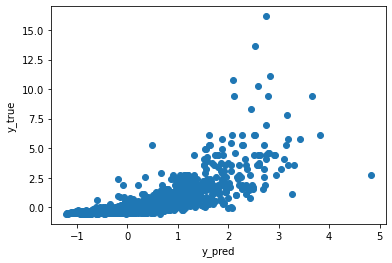

In [55]:
plt.scatter(model.predict(X_train), y_train)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

In [56]:
PARAM_DICT = {'max_depth': [None,3,4,5,6,7,8,9,10,11,15,20,25,30,35,40,45],'min_samples_split': [2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}
ESTIMATOR =  DecisionTreeRegressor(random_state=42)
best_dtc_estimator, best_param = five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train)

# test predict
DTC_test = test_predict(best_dtc_estimator, X_train,X_test,y_train,y_test, best_param)
DTC_test

DecisionTreeRegressor(max_depth=7, min_samples_split=5, random_state=42)
10-CV Best Parameters = {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
10-CV Best Score = -0.23009138060772277


,model,parameters,metric,test predict score
0,DecisionTreeRegressor,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",R_Squared,0.549337
1,DecisionTreeRegressor,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",Adj_R_Squared,0.547138
2,DecisionTreeRegressor,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",MSE,0.507876
3,DecisionTreeRegressor,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",RMSE,0.712654
4,DecisionTreeRegressor,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",MAE,0.213115


In [57]:
# RandomForestRegressor Tune Parameter
PARAM_DICT = {'n_estimators': [10,50,100,200,300],'min_samples_leaf':[1,2,3]}
ESTIMATOR =  RandomForestRegressor(random_state=42)
best_rfc_estimator, best_param = five_cv_prarm_grid(PARAM_DICT, ESTIMATOR,X_train,y_train)

# test predict
RFC_test = test_predict(best_rfc_estimator, X_train,X_test,y_train, y_test, best_param)
RFC_test

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

RandomForestRegressor(random_state=42)
10-CV Best Parameters = {'min_samples_leaf': 1, 'n_estimators': 100}
10-CV Best Score = -0.17093247095136854


<ipython-input-52-a47d409b16d7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


,model,parameters,metric,test predict score
0,RandomForestRegressor,"{'min_samples_leaf': 1, 'n_estimators': 100}",R_Squared,0.655367
1,RandomForestRegressor,"{'min_samples_leaf': 1, 'n_estimators': 100}",Adj_R_Squared,0.653686
2,RandomForestRegressor,"{'min_samples_leaf': 1, 'n_estimators': 100}",MSE,0.388385
3,RandomForestRegressor,"{'min_samples_leaf': 1, 'n_estimators': 100}",RMSE,0.623205
4,RandomForestRegressor,"{'min_samples_leaf': 1, 'n_estimators': 100}",MAE,0.189040


#### Pipeline

In [64]:
from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from sklearn import pipeline      # Pipeline
from sklearn import impute
import time
from sklearn import metrics   
from sklearn import compose

In [81]:
numm_vars  = [ 'total floor', 'floor level', 'Bathroom', 'Size', 'BHK'] 
cate_vars  = ['Furnishing Status', 'Tenant Preferred','Point of Contact','City','Area Type']

In [67]:
df3

,columns,support
0,Size,True
1,Bathroom,True
2,Mumbai,True


In [82]:

cat_4_multModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('one hot', OneHotEncoder(
))
])


num_4_multmodels=pipeline.Pipeline(steps=[
    ("imputer",impute.KNNImputer(n_neighbors=5)),
    ("quantile transformer",QuantileTransformer(n_quantiles=100, random_state=0))
    ])

tree_prepro = compose.ColumnTransformer(transformers=[
    ("cat mult",cat_4_multModels,cate_vars),
    ("num mult",num_4_multmodels,numm_vars)
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro

ColumnTransformer(transformers=[('cat mult',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('one hot', OneHotEncoder())]),
                                 ['Furnishing Status', 'Tenant Preferred',
                                  'Point of Contact', 'City', 'Area Type']),
                                ('num mult',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      random_state=0))]),
                                 ['total floor', 'floor level', 'Bathroom',
                                  'Size'

In [83]:
mult_classifiers={
    "Linear":LinearRegression(),
    "RDF":RandomForestRegressor(random_state=42),
    "GBM": GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "LGBM":AdaBoostRegressor(n_estimators=40,learning_rate=0.1),
    "CatBoost":ExtraTreesRegressor(),
    }

mult_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in mult_classifiers.items()}

mult_classifiers["RDF"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat mult',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one hot',
                                                                   OneHotEncoder())]),
                                                  ['Furnishing Status',
                                                   'Tenant Preferred',
                                                   'Point of Contact', 'City',
                                                   'Area Type']),
                                                 ('num mult',
                                                  Pipeline(steps=[('imputer',
                      

In [86]:
results = pd.DataFrame({'Model': [], 'MSE': [], 'r2_score': [], 'Time': []})

for model_name, model in mult_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(X_train,y_train)
    # GET PREDICTIONS USING x_val
    pred = model.predict(X_test)

    total_time = time.time() - start_time
# mean_squared_error, r2_score, mean_absolute_error
    results = results.append({"Model":    model_name,
                              "MSE": mean_squared_error(y_test, pred),
                              "r2_score.": r2_score(y_test, pred),
                            #   "mean squared log error" : mean_squared_log_error(y_test, pred), # can not use with standart scaler
                            
                              "Time":     total_time},
                              ignore_index=True)
                              
                              





results_ord = results.sort_values(by=['MSE'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['MSE', 'r2_score'], vmin=0, vmax=100, color='#5fba7d')

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

,Model,MSE,r2_score,Time,r2_score.
1,Linear,0.754670,nan,0.053859,0.330344
2,GBM,0.613636,nan,0.175529,0.455491
3,CatBoost,0.470247,nan,1.403937,0.582727
4,LGBM,0.430928,nan,0.284275,0.617617
5,RDF,0.391008,nan,1.576824,0.653039
